Exploring the dailyActivity_merged Dataset of our Project

In [2]:
import pandas as pd

filePath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FitabaseData4.12.16-5.12.16/dailySteps_merged.csv'
dfDailySteps = pd.read_csv(filePath)
# displaying the first few rows of our datset.
print(dfDailySteps.head())

           Id ActivityDay  StepTotal
0  1503960366   4/12/2016      13162
1  1503960366   4/13/2016      10735
2  1503960366   4/14/2016      10460
3  1503960366   4/15/2016       9762
4  1503960366   4/16/2016      12669


In [3]:
# Displaying the basic information about the dataset
print(dfDailySteps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB
None


In [4]:
# Displaying the summary statistics of numeric columns
print(dfDailySteps.describe())

                 Id     StepTotal
count  9.400000e+02    940.000000
mean   4.855407e+09   7637.910638
std    2.424805e+09   5087.150742
min    1.503960e+09      0.000000
25%    2.320127e+09   3789.750000
50%    4.445115e+09   7405.500000
75%    6.962181e+09  10727.000000
max    8.877689e+09  36019.000000


In [30]:
# Displaying the names of all columns
print(dfDailySteps.columns)

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


Data Preprocessing

In [5]:
# Checking for missing values in each column
print(dfDailySteps.isnull().sum())

Id             0
ActivityDay    0
StepTotal      0
dtype: int64


In [6]:
# Explore unique values in a specific columns
print(dfDailySteps['Id'].unique())
print(dfDailySteps['ActivityDay'].unique())
print(dfDailySteps['StepTotal'].unique())

[1503960366 1624580081 1644430081 1844505072 1927972279 2022484408
 2026352035 2320127002 2347167796 2873212765 3372868164 3977333714
 4020332650 4057192912 4319703577 4388161847 4445114986 4558609924
 4702921684 5553957443 5577150313 6117666160 6290855005 6775888955
 6962181067 7007744171 7086361926 8053475328 8253242879 8378563200
 8583815059 8792009665 8877689391]
['4/12/2016' '4/13/2016' '4/14/2016' '4/15/2016' '4/16/2016' '4/17/2016'
 '4/18/2016' '4/19/2016' '4/20/2016' '4/21/2016' '4/22/2016' '4/23/2016'
 '4/24/2016' '4/25/2016' '4/26/2016' '4/27/2016' '4/28/2016' '4/29/2016'
 '4/30/2016' '5/1/2016' '5/2/2016' '5/3/2016' '5/4/2016' '5/5/2016'
 '5/6/2016' '5/7/2016' '5/8/2016' '5/9/2016' '5/10/2016' '5/11/2016'
 '5/12/2016']
[13162 10735 10460  9762 12669  9705 13019 15506 10544  9819 12764 14371
 10039 15355 13755 18134 13154 11181 14673 10602 14727 15103 11100 14070
 12159 11992 10060 12022 12207 12770     0  8163  7007  9107  1510  5370
  6175 10536  2916  4974  6349  4026  853

In [7]:
# Checking for duplicate rows
duplicates = dfDailySteps.duplicated()
print("Number of Duplicate Rows:", duplicates.sum())

duplicate_rows = dfDailySteps[duplicates]
print("\nAs No Duplicate Rows:")
print(duplicate_rows)

# Removing the Duplicate Rows
dfDailySteps = dfDailySteps.drop_duplicates()

# Verifying afterwards
print("\nNo Existing Duplicates:")
print("Total Number of Rows:", len(dfDailySteps))

Number of Duplicate Rows: 0

As No Duplicate Rows:
Empty DataFrame
Columns: [Id, ActivityDay, StepTotal]
Index: []

No Existing Duplicates:
Total Number of Rows: 940


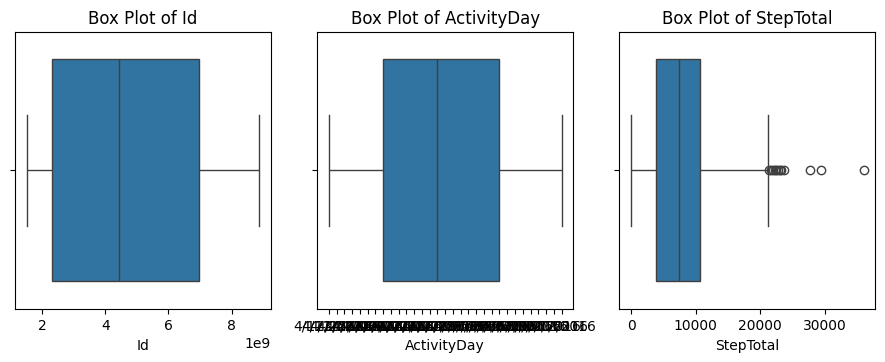

In [8]:
# Visualizing the features to identify the outliers.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

for i, column in enumerate(dfDailySteps.columns):
    plt.subplot(3, 5, i+1)  
    sns.boxplot(x=dfDailySteps[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

Handling the Outliers Separately on Features

1. StepTotal

In [10]:
# We are applying capping

StepTotalUpperlimit = 21000

dfDailySteps['StepTotal'] = dfDailySteps['StepTotal'].clip(upper=StepTotalUpperlimit)
print("Capped TotalSteps:")
print(dfDailySteps['StepTotal'].describe())

Capped TotalSteps:
count      940.000000
mean      7591.561702
std       4924.326982
min          0.000000
25%       3789.750000
50%       7405.500000
75%      10727.000000
max      21000.000000
Name: StepTotal, dtype: float64


In [11]:
# Displaying summary statistics of all columns
print(dfDailySteps.describe())


                 Id     StepTotal
count  9.400000e+02    940.000000
mean   4.855407e+09   7591.561702
std    2.424805e+09   4924.326982
min    1.503960e+09      0.000000
25%    2.320127e+09   3789.750000
50%    4.445115e+09   7405.500000
75%    6.962181e+09  10727.000000
max    8.877689e+09  21000.000000


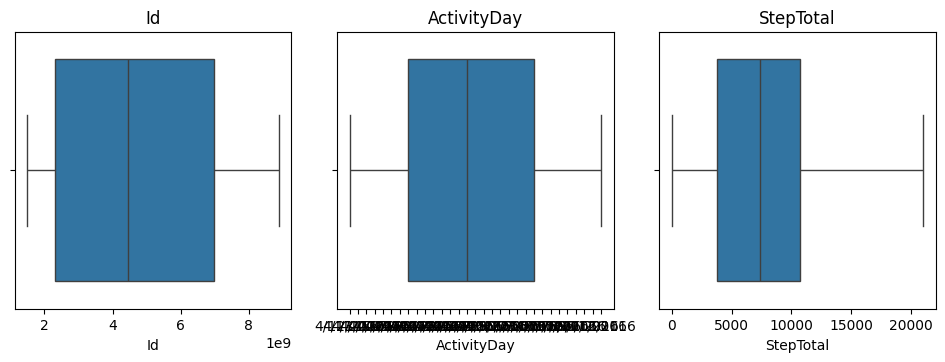

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(16, 10))

# Iterate through each column in the DataFrame
for column in dfDailySteps.columns:
    # Create a box plot for each feature
    plt.subplot(3, 5, dfDailySteps.columns.get_loc(column) + 1)  # Adjust the subplot grid as needed
    sns.boxplot(x=dfDailySteps[column])
    plt.title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [13]:
# df_daily_activity is our DataFrame with outliers removed

# Specifying the path to save the filtered dataset
filteredDatasetPath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/dailySteps_merged_Filtered.csv'

# Saving the DataFrame to a CSV file
dfDailySteps.to_csv(filteredDatasetPath, index=False)

print(f"Filtered dataset saved to: {filteredDatasetPath}")

Filtered dataset saved to: /University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/dailySteps_merged_Filtered.csv
